# Linear Regression - Multi-Variables

You will implement linear regression with multiple variables to predict the prices of houses. Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to first collect information on recent houses sold and make a model of housing prices.

The file ‘multivariate.txt’ contains a training set of housing prices. The first column is the size of the house, the second column is the number of bedrooms and the third column is the price of the house.

## Setup

Set directory path

In [812]:
import os
from google.colab import drive
drive.mount('/content/drive')
# change directory
os.chdir('/content/drive/My Drive/EM0007/1. Supervised/1. Regression/Assignment 1/multi')
!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 data   house_price_prediction_model.h5  'multivariate (Thomas).ipynb'


Import required libraries

In [813]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import feature_column
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras import initializers
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold

In [814]:
print(tf.__version__)

2.15.0


## Prepare the Data

In [815]:
dataframe = pd.read_csv('./data/multivariate data.csv', index_col=None)
# check the data frame info
print(dataframe.info())
# dataframe.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   size             47 non-null     int64
 1   no. of bedrooms  47 non-null     int64
 2   price            47 non-null     int64
dtypes: int64(3)
memory usage: 1.2 KB
None


In [816]:
# Inspect the first few rows of the dataframe
print(dataframe.head())

   size  no. of bedrooms   price
0  2104                3  399900
1  1600                3  329900
2  2400                3  369000
3  1416                2  232000
4  3000                4  539900


In [817]:
dataframe.describe()

,size,no. of bedrooms,price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


## Plot the Data

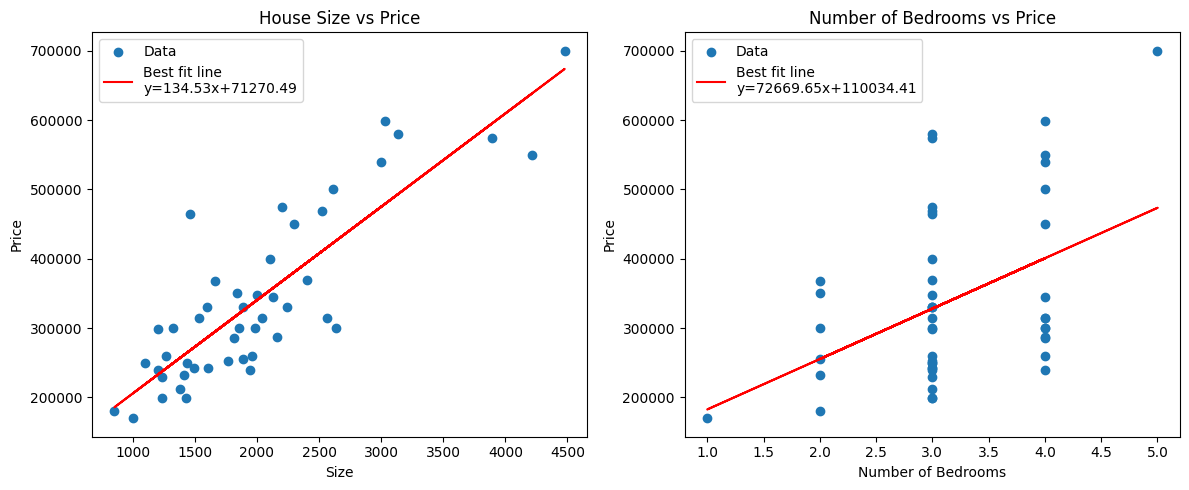

In [818]:
# Function to calculate best fit line and equation
def best_fit_and_equation(x, y):
    # Perform linear regression
    m, b = np.polyfit(x, y, 1)
    # Return the best fit line and the equation parameters
    return m * x + b, m, b

plt.figure(figsize=(12, 5))

# Plotting 'size' vs 'price' with best fit line
plt.subplot(1, 2, 1)
plt.scatter(dataframe['size'], dataframe['price'], label='Data')
best_fit_line, m1, b1 = best_fit_and_equation(dataframe['size'], dataframe['price'])
plt.plot(dataframe['size'], best_fit_line, color='red', label=f'Best fit line\ny={m1:.2f}x+{b1:.2f}')
plt.title('House Size vs Price')
plt.xlabel('Size')
plt.ylabel('Price')
plt.legend()

# Plotting 'no. of bedrooms' vs 'price' with best fit line
plt.subplot(1, 2, 2)
plt.scatter(dataframe['no. of bedrooms'], dataframe['price'], label='Data')
best_fit_line, m2, b2 = best_fit_and_equation(dataframe['no. of bedrooms'], dataframe['price'])
plt.plot(dataframe['no. of bedrooms'], best_fit_line, color='red', label=f'Best fit line\ny={m2:.2f}x+{b2:.2f}')
plt.title('Number of Bedrooms vs Price')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.legend()

plt.tight_layout()
plt.show()


## Feature Normalization

To make sure features are on a similar scale:

$x_i = \frac{x_i - \mu_i}{\sigma_i}$

In [819]:
def featureNormalization(X):
    """
    Take in numpy array of X values and return normalize X values,
    the mean and standard deviation of each feature
    """
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X_norm = (X - mean) / std
    return X_norm, mean, std

In [820]:
# Apply feature normalization
features = dataframe[['size', 'no. of bedrooms']].values
normalized_features, means, stds = featureNormalization(features)
dataframe[['size', 'no. of bedrooms']] = normalized_features

# Prepare features and labels
X = dataframe[['size', 'no. of bedrooms']].values
y = dataframe['price'].values  # Directly using the price

## Process the Data

In [821]:
#Ensure the shape of data
print("Shape of Features (X):", X.shape)
print("Shape of Labels (y):", y.shape)


Shape of Features (X): (47, 2)
Shape of Labels (y): (47,)


In [822]:
# Convert the data to a TensorFlow Dataset
def convert_to_tensorflow_dataset(X, y, batch_size=32):
    dataset = tf.data.Dataset.from_tensor_slices((X, y))
    dataset = dataset.batch(batch_size)
    return dataset

# Convert data
dataset = convert_to_tensorflow_dataset(X, y)

In [823]:
# Reshape y for StandardScaler
y = dataframe['price'].values.reshape(-1, 1)

# Initialize the scaler and fit it to the target variable
scaler = StandardScaler()
y_scaled = scaler.fit_transform(y).flatten()  # Use flatten to convert it back to 1D array


## Build the Model

In [824]:
model.compile(optimizer='sgd', loss='mse')

## Train the Model

In [825]:
# Train for more epochs if needed
history = model.fit(X, y_scaled, epochs=200)

Epoch 1/200
2/2 [==============================] - 0s 7ms/step - loss: 0.1824
Epoch 2/200
2/2 [==============================] - 0s 9ms/step - loss: 0.1815
Epoch 3/200
2/2 [==============================] - 0s 6ms/step - loss: 0.1815
Epoch 4/200
2/2 [==============================] - 0s 6ms/step - loss: 0.1812
Epoch 5/200
2/2 [==============================] - 0s 6ms/step - loss: 0.1811
Epoch 6/200
2/2 [==============================] - 0s 6ms/step - loss: 0.1806
Epoch 7/200
2/2 [==============================] - 0s 6ms/step - loss: 0.1811
Epoch 8/200
2/2 [==============================] - 0s 6ms/step - loss: 0.1804
Epoch 9/200
2/2 [==============================] - 0s 6ms/step - loss: 0.1803
Epoch 10/200
2/2 [==============================] - 0s 6ms/step - loss: 0.1797
Epoch 11/200
2/2 [==============================] - 0s 6ms/step - loss: 0.1805
Epoch 12/200
2/2 [==============================] - 0s 6ms/step - loss: 0.1797
Epoch 13/200
2/2 [==============================] - 0s 6ms/st

In [826]:
print("Shape of actual prices (y):", y.shape)
print("Shape of features (X):", X.shape)


Shape of actual prices (y): (47, 1)
Shape of features (X): (47, 2)


In [827]:
# After re-training
predicted_prices = model.predict(X).flatten()

# Flatten y to make it 1-dimensional
y_flat = y.flatten()

# Assuming 'scaler' is your StandardScaler instance used to scale 'y'
predicted_prices_original_scale = scaler.inverse_transform(predicted_prices.reshape(-1, 1)).flatten()


# Now check the shapes again
print("Shape of flattened actual prices (y_flat):", y_flat.shape)
print("Shape of predicted prices:", predicted_prices.shape)


2/2 [==============================] - 0s 4ms/step
Shape of flattened actual prices (y_flat): (47,)
Shape of predicted prices: (47,)


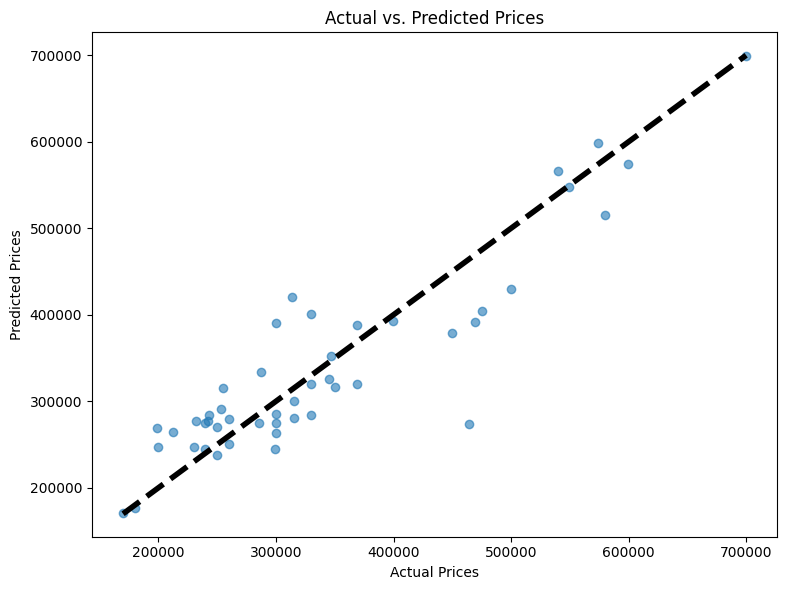

In [828]:
# Actual vs. Predicted Prices on Original Scale
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.scatter(y.flatten(), predicted_prices_original_scale, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)  # Diagonal line
plt.title('Actual vs. Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

plt.tight_layout()
plt.show()


## Predict

In [829]:
# Load the new Excel dataset
new_data = pd.read_excel('/content/drive/My Drive/EM0007/1. Supervised/1. Regression/Assignment 1/multi/data/test housing.xlsx')

# Assuming 'size' and 'no. of bedrooms' are the features used in the model
new_size = new_data['size'].values
new_no_of_bedrooms = new_data['no. of bedrooms'].values

# Apply feature normalization using the same mean and std from training data
new_size_norm = (new_size - means[0]) / stds[0]
new_no_of_bedrooms_norm = (new_no_of_bedrooms - means[1]) / stds[1]

# Combine normalized features into a single array for prediction
new_features_norm = np.column_stack((new_size_norm, new_no_of_bedrooms_norm))

predicted_scaled_prices = model.predict(new_features_norm)  # This is your model's prediction on the scaled features

# Apply inverse transformation to get predictions back to original price scale
predicted_prices = scaler.inverse_transform(predicted_scaled_prices).flatten()

# Update the new data frame with the unscaled predictions
new_data['Predicted_Price'] = predicted_prices

# Display the dataset with predicted prices
print(new_data)

# Save the updated dataset back to Excel
new_data.to_excel('/content/drive/My Drive/EM0007/1. Supervised/1. Regression/Assignment 1/multi/data/test_housing_with_predictions.xlsx', index=False)


1/1 [==============================] - 0s 24ms/step
   size  no. of bedrooms  Predicted_Price
0  1000                2    201485.078125
1  1500                3    277593.375000
2  2000                2    316234.000000
3  2000                3    352554.281250
4  2000                4    289067.531250
5  4000                3    610593.437500
6  3000                4    566507.937500
7  4500                4    603694.500000
8  5000                4    685427.750000
9  5000                5    649586.375000


## Save the Model